In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame({
    "Level": np.arange(8),
    "Salary": [8, 15, 18, 22, 26, 30, 38, 47]
})
df

,Level,Salary
0,0,8
1,1,15
2,2,18
3,3,22
4,4,26
5,5,30
6,6,38
7,7,47


# Visualization dataset

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

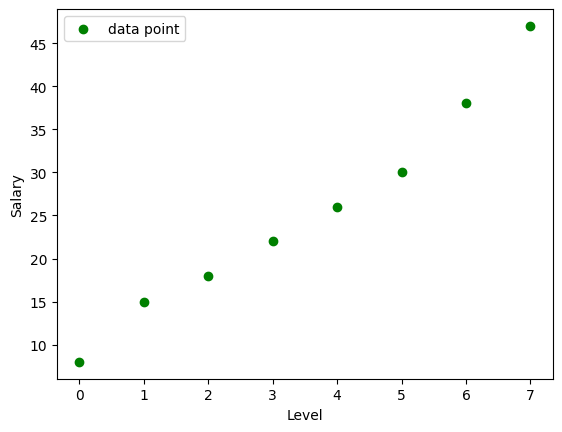

In [ ]:
plt.scatter(X,y,c="g",label = "data point")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [ ]:
# Nên chuyển về vector dạng cột -> chuyển về dạng ma trận N dòng 1 cột -> Chuẩn với toán học
class LinearRegression:
    def __init__(self,lr = 0.01, batch_size = 1, epochs = 100, shuffle = False):
        self.lr = lr # learning rate
        self.batch_size = batch_size # num sample to training
        self.epochs = epochs # epoch: Number of times the model is learned in all data
        self.shuffle = shuffle # allow shuffle data in each epoch
        self.w = None
        self.Nfeature = None # number of feature of data train
        self.Nsample = None # number of sample of data train
        self.Losses = [] # List of loss of each epoch
    def checkDim(self,X):
        if X.ndim == 1:
            raise ValueError("X must be 2 Dimensional")
        return 1
    # add feature have value = 1 on head each sample
    def addfeature1(self,X):
        if self.checkDim(X):
            if X.shape[1] == self.Nfeature + 1: return X
            else:
                feature1 = np.ones(X.shape[0]).reshape(-1,1)
                return np.concatenate((feature1,X),axis = 1)
    # function predict
    def predict(self,X):
        X = self.addfeature1(X)
        return X@self.w

    # Compute Loss
    def compute_loss(self,y_pred,y):
        return np.mean((y_pred-y)**2)/(2*y_pred.shape[0])

    # Compute gradient Loss with w
    # Loss = 1/2m *(y_pred-y)^2 -> m is bacth_size
    def dL_dw(self,y_pred,y,X):
        return X.T@(y_pred - y)*1/X.shape[0] # / for X.shape[0] because the sample of X != batch_size

    # function training model
    def fit(self,X,y):
        self.Nsample, self.Nfeature = X.shape
        # add feature 1 for X
        X = self.addfeature1(X)
        y = y.reshape(-1,1)
        self.w = np.random.uniform(-1,1,size= self.Nfeature+1).reshape(-1,1)# w is matrix have shape (Nfeatur,1)
        data_train = np.concatenate((X,y),axis = 1)
        for epoch in range(self.epochs):
            if self.shuffle: np.random.shuffle(data_train)
            Loss = [] # Loss of 1 epoch
            for i in range(0,self.Nsample,self.batch_size):
                batch = data_train[i:i+self.batch_size]
                X_train, ytrain = batch[:,:-1], batch[:,-1].reshape(-1,1)
                y_pred = self.predict(X_train)
                loss = self.compute_loss(y_pred,ytrain)
                Loss.append(loss) # append loss of each batch
                dL_dw = self.dL_dw(y_pred,ytrain,X_train)
                self.w -= self.lr*dL_dw
            self.Losses.append(sum(Loss)/len(Loss))
            print(f"epoch: {epoch+1:<5} ====== Loss = {self.Losses[-1].item():<10.4f} =============== w = {str(self.w.reshape(1,-1)):<20}")

In [ ]:
X = X.to_numpy()
y = y.to_numpy()

In [ ]:
# khởi tạo mô hình hồi quy tuyến tính và huấn luyện nó với bộ dữ liệu trên
rg = LinearRegression(epochs=200,lr=0.01,batch_size=8,shuffle=False)
rg.fit(X,y)

epoch: 1     ====== Loss = 51.2031    =============== w = [[0.53377457 1.00020606]]
epoch: 2     ====== Loss = 34.5631    =============== w = [[0.74842961 1.96648789]]
epoch: 3     ====== Loss = 23.4307    =============== w = [[0.92711824 2.75615747]]
epoch: 4     ====== Loss = 15.9826    =============== w = [[1.07638155 3.40138078]]
epoch: 5     ====== Loss = 10.9991    =============== w = [[1.2015694  3.92846579]]
epoch: 6     ====== Loss = 7.6642     =============== w = [[1.30705741 4.35892935]]
epoch: 7     ====== Loss = 5.4321     =============== w = [[1.39642431 4.7103697 ]]
epoch: 8     ====== Loss = 3.9377     =============== w = [[1.47259712 4.99718015]]
epoch: 9     ====== Loss = 2.9368     =============== w = [[1.53796985 5.23113273]]
epoch: 10    ====== Loss = 2.2660     =============== w = [[1.5945005  5.42185555]]
epoch: 11    ====== Loss = 1.8161     =============== w = [[1.64379055 5.57722332]]
epoch: 12    ====== Loss = 1.5139     =============== w = [[1.68714983 5.703

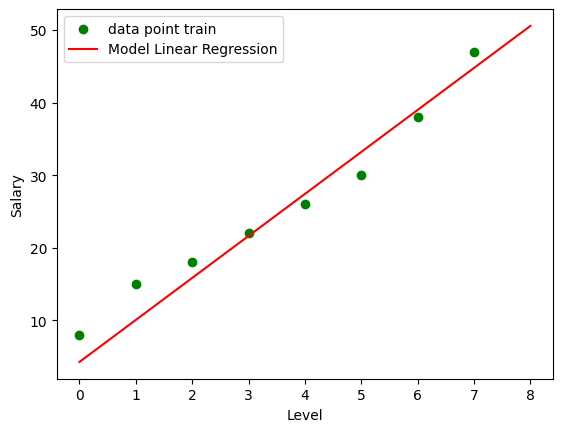

In [ ]:
# Vẽ mô hình sau khi huấn luyện
X_plot = np.arange(0,9,1)
y_plot = rg.predict(X_plot.reshape(-1,1))
plt.scatter(X,y,c="g",label = "data point train")
plt.plot(y_plot,'r',label = "Model Linear Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

# **================= Polynomial Regssion =====================**

In [ ]:
class PolynomialRegression:
    def __init__(self,lr = 0.01, batch_size = 1, epochs = 100, shuffle = False,degree = 2):
        self.lr = lr # learning rate
        self.batch_size = batch_size # num sample to training
        self.epochs = epochs # epoch: Number of times the model is learned in all data
        self.shuffle = shuffle # allow shuffle data in each epoch
        self.w = None
        self.Nfeature = None # number of feature of data train
        self.Nsample = None # number of sample of data train
        self.Losses = [] # List of loss of each epoch
        self.degree = degree # Bậc của hàm đa thức
    def checkDim(self,X):
        if X.ndim == 1:
            raise ValueError("X must be 2 Dimensional")
        return 1
    # add feature have value = 1 on head each sample
    def addfeature1(self,X):
        if self.checkDim(X):
            if X.shape[1] == self.Nfeature + 1: return X
            else:
                feature1 = np.ones(X.shape[0]).reshape(-1,1)
                return np.concatenate((feature1,X),axis = 1)
    # ================================================= Đây chính là điểm khác biệt giữa Linear và Polynomial ========================================

    # function create feature polynomial - Một hàm tạo ra đặc trưng đa thức
    # degree: bậc -> số bậc của hàm đa thức do người dùng quy định
    def create_feature_polynomial(self,X,degree = 2):
      if self.checkDim(X):
        X_new = X.copy()
        for i in range(2,degree+1):
          X_new = np.concatenate((X_new,X**i),axis = 1)
        return X_new
    # ================================================================================================================================================
    # function predict
    def predict(self,X):
        X = self.addfeature1(X)
        return X@self.w

    # Compute Loss
    def compute_loss(self,y_pred,y):
        return np.mean((y_pred-y)**2)/(2*y_pred.shape[0])

    # Compute gradient Loss with w
    # Loss = 1/2m *(y_pred-y)^2 -> m is bacth_size
    def dL_dw(self,y_pred,y,X):
        return X.T@(y_pred - y)*1/X.shape[0] # / for X.shape[0] because the sample of X != batch_size

    # function training model
    def fit(self,X,y):
        X = self.create_feature_polynomial(X,degree=self.degree)
        self.Nsample, self.Nfeature = X.shape
        # add feature 1 for X
        X = self.addfeature1(X)
        y = y.reshape(-1,1)
        self.w = np.random.uniform(-1,1,size= self.Nfeature+1).reshape(-1,1)# w is matrix have shape (Nfeatur,1)
        data_train = np.concatenate((X,y),axis = 1)
        for epoch in range(self.epochs):
            if self.shuffle: np.random.shuffle(data_train)
            Loss = [] # Loss of 1 epoch
            for i in range(0,self.Nsample,self.batch_size):
                batch = data_train[i:i+self.batch_size]
                X_train, ytrain = batch[:,:-1], batch[:,-1].reshape(-1,1)
                y_pred = self.predict(X_train)
                loss = self.compute_loss(y_pred,ytrain)
                Loss.append(loss) # append loss of each batch
                dL_dw = self.dL_dw(y_pred,ytrain,X_train)
                self.w -= self.lr*dL_dw
            self.Losses.append(sum(Loss)/len(Loss))
            print(f"epoch: {epoch+1:<5} ====== Loss = {self.Losses[-1].item():<10.4f} =============== w = {str(self.w.reshape(1,-1)):<20}")

In [ ]:
Path = '/content/drive/MyDrive/AIO 2024/Module_4/Week 2/T7/Data/nonlinear_data.csv'

In [ ]:
df_nonlinear = pd.read_csv(Path)
df_nonlinear

,X,y
0,-2.000000,-32.235948
1,-1.959596,-31.814113
2,-1.919192,-29.513914
3,-1.878788,-26.593066
4,-1.838384,-25.369446
...,...,...
95,1.838384,14.424957
96,1.878788,14.725084
97,1.919192,17.545332
98,1.959596,16.981117


In [ ]:
# Lấy ra thống kê của bộ dữ liệu
df_nonlinear.describe()

,X,y
count,1.000000e+02,100.000000
mean,1.532108e-16,-2.660731
std,1.172181e+00,10.641215
min,-2.000000e+00,-32.235948
25%,-1.000000e+00,-5.663891
50%,1.006140e-16,-0.429439
75%,1.000000e+00,1.962092
max,2.000000e+00,18.401989


In [ ]:
X_test = df_nonlinear.iloc[:,:-1].to_numpy()
y_test = df_nonlinear.iloc[:,-1].to_numpy()

# Biểu diễn DL phi tuyến

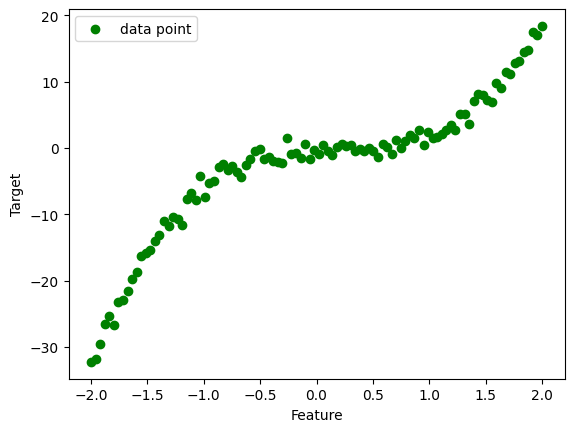

In [ ]:
plt.scatter(X_test,y_test,c="g",label = "data point")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

In [ ]:
Polynomial_Regression = PolynomialRegression(epochs=1000,lr=0.00001,batch_size=1,shuffle=False,degree=4)

In [ ]:
# Huấn luyện mô hình
Polynomial_Regression.fit(X_test,y_test)

epoch: 1     ====== Loss = 108.0667   =============== w = [[-0.37405    -0.68389412  0.77961464 -0.62700321  0.36267095]]
epoch: 2     ====== Loss = 104.8337   =============== w = [[-0.3784729  -0.66966646  0.76823059 -0.58649745  0.32857283]]
epoch: 3     ====== Loss = 101.7313   =============== w = [[-0.38276524 -0.65559305  0.75721378 -0.54643357  0.29562724]]
epoch: 4     ====== Loss = 98.7527    =============== w = [[-0.38693139 -0.64167218  0.74655186 -0.50680669  0.26379535]]
epoch: 5     ====== Loss = 95.8915    =============== w = [[-0.39097561 -0.62790219  0.73623287 -0.46761196  0.23303967]]
epoch: 6     ====== Loss = 93.1415    =============== w = [[-0.39490198 -0.6142814   0.72624527 -0.4288446   0.20332394]]
epoch: 7     ====== Loss = 90.4973    =============== w = [[-0.39871447 -0.60080818  0.7165779  -0.39049989  0.17461317]]
epoch: 8     ====== Loss = 87.9533    =============== w = [[-0.4024169  -0.58748091  0.70721997 -0.35257314  0.14687349]]
epoch: 9     ====== Loss

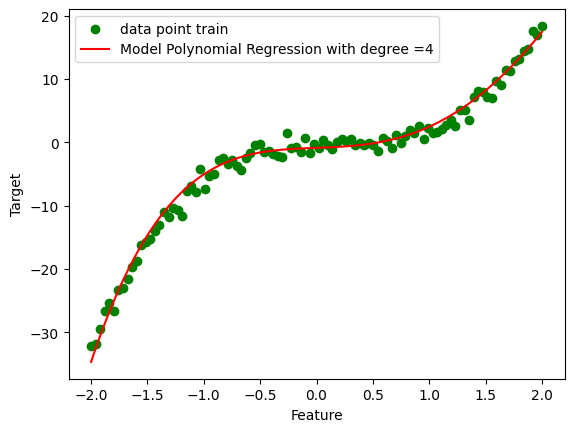

In [ ]:
# Vẽ mô hình sau khi huấn luyện
X_plot = np.arange(-2,2,0.0001)
y_plot = Polynomial_Regression.w[0,0] + Polynomial_Regression.w[1,0]*X_plot + Polynomial_Regression.w[2,0]*X_plot**2 + Polynomial_Regression.w[3,0]*X_plot**3 + Polynomial_Regression.w[4,0]*X_plot**4
plt.scatter(X_test,y_test,c="g",label = "data point train")
plt.plot(X_plot,y_plot,'r',label = f"Model Polynomial Regression with degree ={Polynomial_Regression.degree}")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()

# **Dùng thử mô hình hồi quy tuyến tính để huấn luyện với dữ liệu phi tuyến trên**

In [ ]:
rg = LinearRegression(epochs=1000,lr=0.01,batch_size=1,shuffle=False)
rg.fit(X_test,y_test)

epoch: 1     ====== Loss = 34.6157    =============== w = [[-0.84263119  5.56086127]]
epoch: 2     ====== Loss = 12.5008    =============== w = [[-1.58646952  7.21978703]]
epoch: 3     ====== Loss = 9.9281     =============== w = [[-1.88173775  7.64253107]]
epoch: 4     ====== Loss = 9.4674     =============== w = [[-1.99283989  7.74752144]]
epoch: 5     ====== Loss = 9.3558     =============== w = [[-2.03324456  7.7726182 ]]
epoch: 6     ====== Loss = 9.3250     =============== w = [[-2.04759973  7.77825873]]
epoch: 7     ====== Loss = 9.3160     =============== w = [[-2.05261508  7.77938988]]
epoch: 8     ====== Loss = 9.3134     =============== w = [[-2.05434558  7.77956139]]
epoch: 9     ====== Loss = 9.3126     =============== w = [[-2.05493701  7.77956227]]
epoch: 10    ====== Loss = 9.3124     =============== w = [[-2.05513765  7.7795472 ]]
epoch: 11    ====== Loss = 9.3123     =============== w = [[-2.05520532  7.77953798]]
epoch: 12    ====== Loss = 9.3123     =============== 

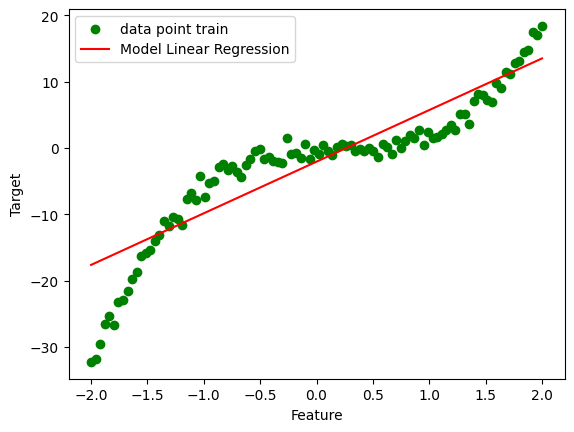

In [ ]:
# Vẽ mô hình hồi quy tuyến tính sau khi đã huấn luyện với bộ dữ liệu trên
plt.scatter(X_test,y_test,c="g",label = "data point train")
X_plot = np.arange(-2,3,1)
y_plot = rg.predict(X_plot.reshape(-1,1))
plt.plot(X_plot,y_plot,'r',label = "Model Linear Regression")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

#  **Sử dụng Sklearn để tạo ra đặc trưng đa thức - phi tuyến**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
tranformer = PolynomialFeatures(degree=2,include_bias=False)

In [ ]:
X_tranformer = tranformer.fit_transform(X_test)

In [ ]:
X_tranformer

array([[-2.00000000e+00,  4.00000000e+00],
       [-1.95959596e+00,  3.84001632e+00],
       [-1.91919192e+00,  3.68329762e+00],
       [-1.87878788e+00,  3.52984389e+00],
       [-1.83838384e+00,  3.37965514e+00],
       [-1.79797980e+00,  3.23273135e+00],
       [-1.75757576e+00,  3.08907254e+00],
       [-1.71717172e+00,  2.94867871e+00],
       [-1.67676768e+00,  2.81154984e+00],
       [-1.63636364e+00,  2.67768595e+00],
       [-1.59595960e+00,  2.54708703e+00],
       [-1.55555556e+00,  2.41975309e+00],
       [-1.51515152e+00,  2.29568411e+00],
       [-1.47474747e+00,  2.17488011e+00],
       [-1.43434343e+00,  2.05734109e+00],
       [-1.39393939e+00,  1.94306703e+00],
       [-1.35353535e+00,  1.83205795e+00],
       [-1.31313131e+00,  1.72431385e+00],
       [-1.27272727e+00,  1.61983471e+00],
       [-1.23232323e+00,  1.51862055e+00],
       [-1.19191919e+00,  1.42067136e+00],
       [-1.15151515e+00,  1.32598714e+00],
       [-1.11111111e+00,  1.23456790e+00],
       [-1.

In [ ]:
# Tạo ra các đặc trưng đa thức giao nhau iteraction terms
tranformer = PolynomialFeatures(degree=2,include_bias=False,)
X_transf = tranformer.fit_transform(X_test)
X_transf

array([[-2.        ],
       [-1.95959596],
       [-1.91919192],
       [-1.87878788],
       [-1.83838384],
       [-1.7979798 ],
       [-1.75757576],
       [-1.71717172],
       [-1.67676768],
       [-1.63636364],
       [-1.5959596 ],
       [-1.55555556],
       [-1.51515152],
       [-1.47474747],
       [-1.43434343],
       [-1.39393939],
       [-1.35353535],
       [-1.31313131],
       [-1.27272727],
       [-1.23232323],
       [-1.19191919],
       [-1.15151515],
       [-1.11111111],
       [-1.07070707],
       [-1.03030303],
       [-0.98989899],
       [-0.94949495],
       [-0.90909091],
       [-0.86868687],
       [-0.82828283],
       [-0.78787879],
       [-0.74747475],
       [-0.70707071],
       [-0.66666667],
       [-0.62626263],
       [-0.58585859],
       [-0.54545455],
       [-0.50505051],
       [-0.46464646],
       [-0.42424242],
       [-0.38383838],
       [-0.34343434],
       [-0.3030303 ],
       [-0.26262626],
       [-0.22222222],
       [-0